In [1]:
from esda.moran import Moran
import geopandas as gpd
from libpysal.weights import DistanceBand, KNN
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sys

from statshelper import q_q_plot

In [2]:
df = pd.read_csv("./data/processed/Cleaned_Chicago_Sales.csv")
df.head()

,Unnamed: 0,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Type of Residence,Apartments,Wall Material,Roof Material,...,Bool-Type of Residence-1,Bool-Type of Residence-2,Bool-Type of Residence-4,Bool-Type of Residence-8,Bool-Type of Residence-7,Bool-Type of Residence-6,Bool-Wall Material-2,Bool-Wall Material-3,Bool-Wall Material-1,Bool-Wall Material-4
0,2,16094150130000,211,13,-0.195903,77,3.0,6.0,2.0,2.0,...,0,0,0,0,0,0,1,0,0,0
1,5,4252000820000,204,100,2.102980,25,5.0,0.0,2.0,4.0,...,0,0,0,0,0,0,1,0,0,0
2,8,14322110150000,208,12,-0.256898,74,3.0,0.0,2.0,6.0,...,0,0,0,0,0,0,1,0,0,0
3,9,27021200080000,204,34,0.709559,28,1.0,0.0,3.0,1.0,...,1,0,0,0,0,0,0,1,0,0
4,11,13121080620000,204,42,0.043385,71,1.0,0.0,2.0,1.0,...,1,0,0,0,0,0,1,0,0,0


In [3]:
i_vars = [
    'Age',
    'Age Decade',
    'Bedrooms',  
    'Building Square Feet', 
    'Estimate (Building)', 
    'Estimate (Land)', 
    'Fireplaces', 
    'Full Baths',
    'Garage 1 Area',
    'Garage 2 Area', 
    'Half Baths', 
    'Land Square Feet',
    'Lot Size Squared',
    'Rooms',
    'Sale Quarter'
    ]
dep_var = ['Sale Price']
X = df[i_vars]
y = df[dep_var]

In [4]:
X_cons = sm.add_constant(X)
ols = sm.OLS(y, X_cons, name_y=dep_var, name_x=i_vars).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                 5.348e+04
Date:                Tue, 20 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:20:31   Log-Likelihood:            -2.7703e+05
No. Observations:              326484   AIC:                         5.541e+05
Df Residuals:                  326470   BIC:                         5.542e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -6.028e-10      0.001  -6.09e-07      1.000      -0.002       0.002
Age                     -0.0070      0.001    -12.134      0.000      -0.008      -0.006
Age Decade              -0.0070      0.001    -12.134      0.000      -0.008      -0.006
Bedrooms                -0.0532      0.002    -22.873      0.000      -0.058      -0.049
Building Square Feet     0.1016      0.002     45.966      0.000       0.097       0.106
Estimate (Building)      0.5143      0.001    343.900      0.000       0.511       0.517
Estimate (Land)          0.2694      0.001    204.412      0.000       0.267       0.272
Fireplaces               0.0590      0.001     49.182      0.000       0.057       0.061
Full Baths               0.1005      0.002     54.776      0.000       0.097       0.104
Garage 1 Area            0.0250      0.001     24.678      0.000       0.023       0.027
Garage 2 Area           -0.0003      0.001     -0.292      0.770      -0.002       0.002
Half Baths               0.0431      0.001     38.052      0.000       0.041       0.045
Land Square Feet        -0.0757      0.001    -51.825      0.000      -0.079      -0.073
Lot Size Squared         0.0411      0.001     29.400      0.000       0.038       0.044
Rooms                   -0.0335      0.003    -13.279      0.000      -0.038      -0.029
==============================================================================
Omnibus:                   234788.670   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        240709724.001
Skew:                           2.081   Prob(JB):                         0.00
Kurtosis:                     135.956   Cond. No.                     3.19e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

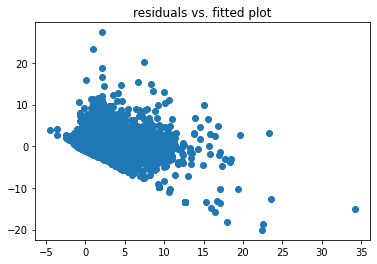

In [5]:
plt.scatter(ols.predict(), ols.resid)
plt.title("residuals vs. fitted plot")
plt.show()

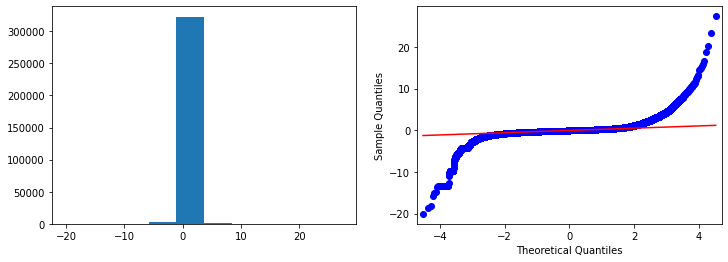

In [6]:
q_q_plot(ols.resid)

In [7]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

<AxesSubplot:>

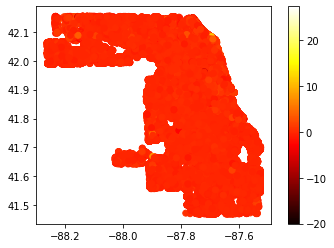

In [8]:
gdf.plot(column=ols.resid, cmap="hot", legend=True
         alpha=0.5, figsize=(12,8))

In [9]:
w = DistanceBand.from_dataframe(gdf,threshold=.0075) # needed k large enough that it was connected
w.transform = 'R'

/home/dijkstra/.local/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 88 disconnected components.
 There are 27 islands with ids: 1025, 3000, 8645, 8681, 14607, 25516, 29126, 34489, 46605, 47803, 49146, 66007, 91329, 93298, 98460, 108991, 110052, 164015, 164391, 218324, 228073, 235430, 244028, 267946, 282806, 295834, 320202.
  warnings.warn(message)


('WARNING: ', 1025, ' is an island (no neighbors)')
('WARNING: ', 3000, ' is an island (no neighbors)')
('WARNING: ', 8645, ' is an island (no neighbors)')
('WARNING: ', 8681, ' is an island (no neighbors)')
('WARNING: ', 14607, ' is an island (no neighbors)')
('WARNING: ', 25516, ' is an island (no neighbors)')
('WARNING: ', 29126, ' is an island (no neighbors)')
('WARNING: ', 34489, ' is an island (no neighbors)')
('WARNING: ', 46605, ' is an island (no neighbors)')
('WARNING: ', 47803, ' is an island (no neighbors)')
('WARNING: ', 49146, ' is an island (no neighbors)')
('WARNING: ', 66007, ' is an island (no neighbors)')
('WARNING: ', 91329, ' is an island (no neighbors)')
('WARNING: ', 93298, ' is an island (no neighbors)')
('WARNING: ', 98460, ' is an island (no neighbors)')
('WARNING: ', 108991, ' is an island (no neighbors)')
('WARNING: ', 110052, ' is an island (no neighbors)')
('WARNING: ', 164015, ' is an island (no neighbors)')
('WARNING: ', 164391, ' is an island (no neighb

In [ ]:
w.plot(gdf)

In [ ]:
ols_moran = Moran(ols.resid, w, permutations=199)
plot_moran(ols_moran, zstandard=True, figsize=(10,4))
plt.show()